# Data Import and Cleaning

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# reading the female data into a pandas dataframe

females = pd.read_csv('/Users/christophermarker/Documents/MA_Exercise/MA_Exer_PikesPeak_Females.txt', 
                      sep='\t', lineterminator='\r', encoding='latin-1')
females['Sex'] = 'f'

In [3]:
# reading the female data into a pandas dataframe

males = pd.read_csv('/Users/christophermarker/Documents/MA_Exercise/MA_Exer_PikesPeak_Males.txt', 
                    sep='\t', lineterminator='\r', encoding='latin-1')
males['Sex'] = 'm'

In [4]:
# creating a dataframe containing both male and female data

full = females.append(males)
full = full.reset_index(drop=True)

In [5]:
# checking for null values

full.isnull().sum()

Place       0
Div/Tot     6
Num         2
Name        2
Ag          4
Hometown    2
Gun Tim     2
Net Tim     2
Pace        2
Sex         0
dtype: int64

In [6]:
# removing rows containing only null values

full.drop([2371, 1105], inplace=True)
full = full.reset_index(drop=True)

In [7]:
# removing unneccesary characters and making the place field numerical

full['Place'] = full['Place'].str.replace('\n', '')
full['Place'] = full['Place'].astype(float)

In [8]:
full[full.isnull().any(axis=1)]

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Sex
964,965.0,NaN,201.0,Carla Sabloff,0.0,Mclean VA,1:13:38,1:08:29,11:02,f
979,980.0,NaN,2843.0,Susan Rasmussen,NaN,Gaithersburg MD,1:14:51,1:09:34,11:12,f
1630,526.0,NaN,2003.0,Chris Nash,0.0,Brookeville MD,51:04,49:35,7:59,m
1829,725.0,NaN,1999.0,Alan Nadelbach,NaN,Columbia MD,54:16,52:56,8:32,m


In [9]:
full[full['Ag'] == 0.0]

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Sex
964,965.0,NaN,201.0,Carla Sabloff,0.0,Mclean VA,1:13:38,1:08:29,11:02,f
1630,526.0,NaN,2003.0,Chris Nash,0.0,Brookeville MD,51:04,49:35,7:59,m


In [10]:
full.dtypes

Place       float64
Div/Tot      object
Num         float64
Name         object
Ag          float64
Hometown     object
Gun Tim      object
Net Tim      object
Pace         object
Sex          object
dtype: object

In [11]:
full.Ag.max()

84.0

In [12]:
full.Ag.min()

-1.0

In [13]:
# A short function to assign an age group

def revise_div(i):
    div = np.nan
    if i > 0.0 and i <= 14.0:
        div = ('0-14')
    if i >= 15.0 and i <= 19.0:
        div = ('15-19')
    if i >= 20.0 and i <= 29.0:
        div = ('20-29')
    if i >= 30.0 and i <= 39.0:
        div = ('30-39')
    if i >= 40.0 and i <= 49.0:
        div = ('40-49')
    if i >= 50.0 and i <= 59.0:
        div = ('50-59')
    if i >= 60.0 and i <= 69.0:
        div = ('60-69')
    if i >= 70.0 and i <= 79.0:
        div = ('70-79')
    if i >= 80.0 and i <= 89.0:
        div = ('80-89')
            
    return div 

In [14]:
# using the previously created function to map a revised div series

full['Div_revised'] = full['Ag'].map(lambda x: revise_div(x))

In [15]:
# create a function to remove extra characters from the time field

def strip_chars(time):
    
    time2 = time
    
    chars = ['0','1','2','3','4','5','6','7','8','9',':']
    
    for i in time:
        if i not in chars:
            time2 = time2.replace(i, '')
            
    return time2

In [16]:
# remove extra characters from time fields using the previously created function

full['Net Tim'] = full['Net Tim'].map(lambda x: strip_chars(x))
full['Gun Tim'] = full['Gun Tim'].map(lambda x: strip_chars(x))
full['Pace'] = full['Pace'].map(lambda x: strip_chars(x))

In [17]:
# create a function to convert the time strings into minutes

def convert_time(i):
    units = i.split(':')
    units = [float(i) for i in units]
    
    if len(units) == 2:
        seconds = (units[0] * 60) + units[1]
    if len(units) == 3:
        seconds = (units[0] * 3600) + (units[1] * 60) + units[2]
    minutes = seconds / 60
    
    return minutes
        

In [18]:
# using the previously created function to map revised minutes series for each time based column

full['minutes_gun_tim'] = full['Gun Tim'].map(lambda x: convert_time(x))
full['minutes_net_tim'] = full['Net Tim'].map(lambda x: convert_time(x))
full['minutes_Pace'] = full['Pace'].map(lambda x: convert_time(x))

# Exploring the Data

### Question 1

In [19]:
# Explore the mean, median, mode, and range for female net times

print('The mean for female net times is:', full[full['Sex'] == 'f'].minutes_net_tim.mean(), 'minutes.')
print('The median for female net times is:', full[full['Sex'] == 'f'].minutes_net_tim.median(), 'minutes.')
print('The 5 modes, each occurring 5 times, for female net time are:', 
      list(full[full['Sex'] == 'f']['Net Tim'].mode()),'.')
print('The fastest female net time is', 
      full.loc[full['minutes_net_tim'] == full[full['Sex'] == 'f'].minutes_net_tim.min(), 'Net Tim'].values[0], 
      'and the slowest female net time is', 
      full.loc[full['minutes_net_tim'] == full[full['Sex'] == 'f'].minutes_net_tim.max(), 'Net Tim'].values[0])

The mean for female net times is: 58.4747360482655 minutes.
The median for female net times is: 57.85 minutes.
The 5 modes, each occurring 5 times, for female net time are: ['48:06', '51:35', '52:59', '53:29', '59:00'] .
The fastest female net time is 32:58 and the slowest female net time is 1:46:49


In [20]:
# Explore the mean, median, mode, and range for male net times

print('The mean for male net times is:', full[full['Sex'] == 'm'].minutes_net_tim.mean(), 'minutes.')
print('The median for male net times is:', full[full['Sex'] == 'm'].minutes_net_tim.median(), 'minutes.')
print('The 10 modes, each occurring 4 times, for male net time are:', 
      list(full[full['Sex'] == 'm']['Net Tim'].mode()),'.')
print('The fastest male net time is', 
      full.loc[full['minutes_net_tim'] == full[full['Sex'] == 'm'].minutes_net_tim.min(), 'Net Tim'].values[0], 
      'and the slowest male net time is', 
      full.loc[full['minutes_net_tim'] == full[full['Sex'] == 'm'].minutes_net_tim.max(), 'Net Tim'].values[0])

The mean for male net times is: 52.1325164690383 minutes.
The median for male net times is: 51.38333333333333 minutes.
The 10 modes, each occurring 4 times, for male net time are: ['35:28', '47:05', '47:23', '49:48', '49:58', '51:20', '52:06', '52:42', '54:24', '56:43'] .
The fastest male net time is 28:47 and the slowest male net time is 1:40:38


### Question 2

In [21]:
# creating a column with the time differentials

full['gun_net_difference_seconds'] = (full.minutes_gun_tim - full.minutes_net_tim) * 60

In [22]:
# splitting the men and women into two new dataframes

men = full[full['Sex'] == 'm']
women = full[full['Sex'] == 'f']

In [23]:
full.gun_net_difference_seconds.mean()

171.1337552742616

In [24]:
full.gun_net_difference_seconds.median()

195.99999999999994

In [25]:
full.gun_net_difference_seconds.min()

0.0

In [26]:
full.gun_net_difference_seconds.max()

560.0000000000001

In [27]:
full[full['gun_net_difference_seconds'] == 0].shape

(14, 15)

Text(0.5,1,'Distribution of Gun/Net Time Differentials (All)')

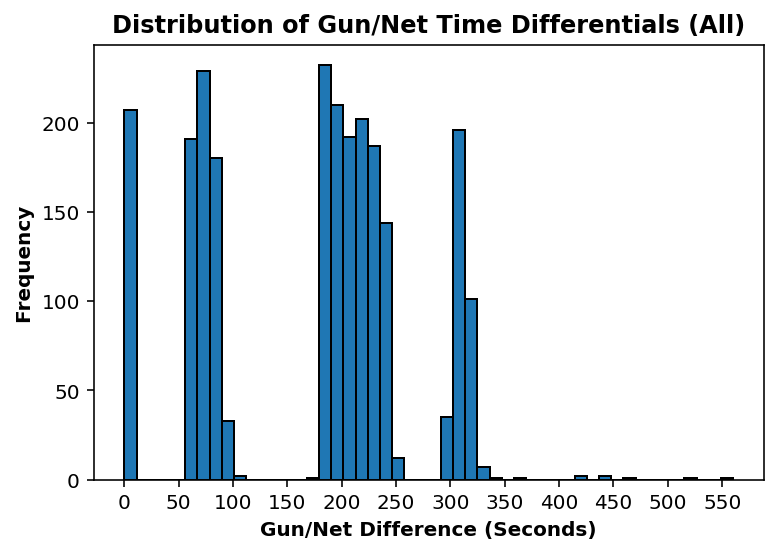

In [28]:
plt.hist(full["gun_net_difference_seconds"], ec='black', bins=50)
plt.xticks(np.arange(min(full["gun_net_difference_seconds"]), max(full["gun_net_difference_seconds"])+1, 50.0))
plt.xlabel('Gun/Net Difference (Seconds)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Frequency', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title('Distribution of Gun/Net Time Differentials (All)',  fontweight='bold', fontsize='12', horizontalalignment='center')

Text(0.5,1,'Distribution of Gun/Net Time Differentials (Men)')

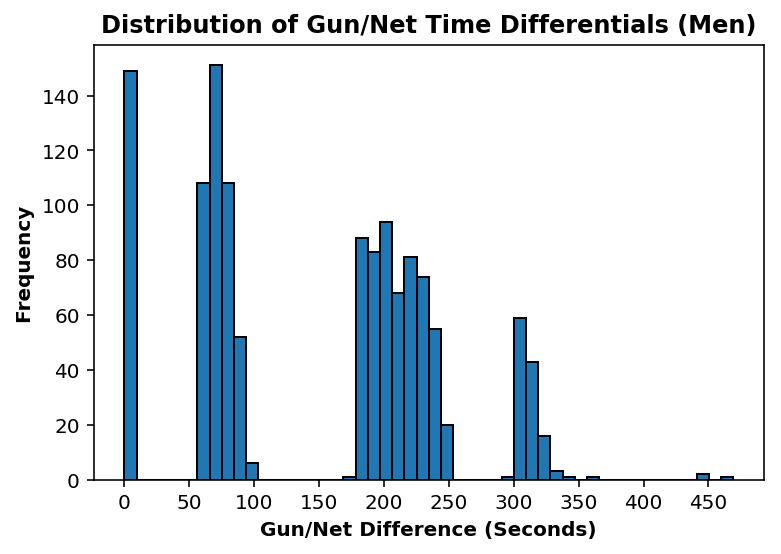

In [29]:
plt.hist(men["gun_net_difference_seconds"], ec='black', bins=50)
plt.xticks(np.arange(min(men["gun_net_difference_seconds"]), max(men["gun_net_difference_seconds"])+1, 50.0))
plt.xlabel('Gun/Net Difference (Seconds)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Frequency', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title('Distribution of Gun/Net Time Differentials (Men)',  fontweight='bold', fontsize='12', horizontalalignment='center')

Text(0.5,1,'Distribution of Gun/Net Time Differentials (Women)')

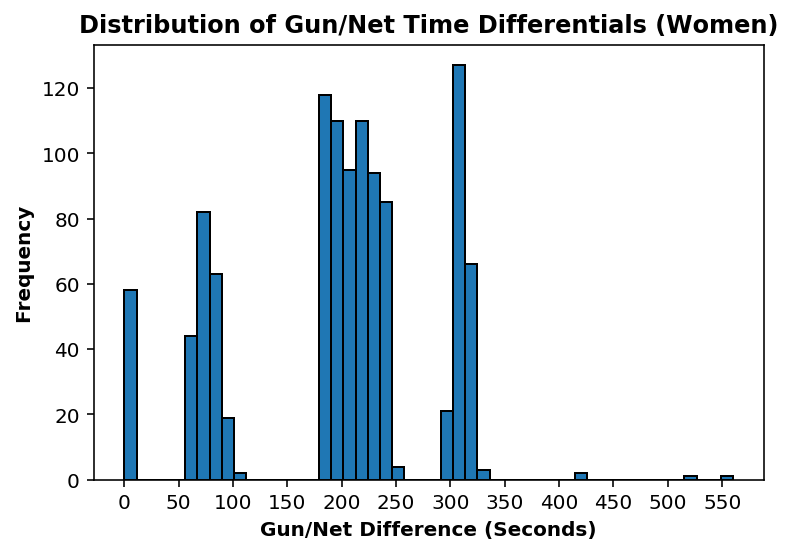

In [30]:
plt.hist(women["gun_net_difference_seconds"], ec='black', bins=50)
plt.xticks(np.arange(min(women["gun_net_difference_seconds"]), max(women["gun_net_difference_seconds"])+1, 50.0))
plt.xlabel('Gun/Net Difference (Seconds)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Frequency', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title('Distribution of Gun/Net Time Differentials (Women)',  fontweight='bold', fontsize='12', horizontalalignment='center')

Text(0.5,1,'Gun/Net Time Differentials vs. Net Time')

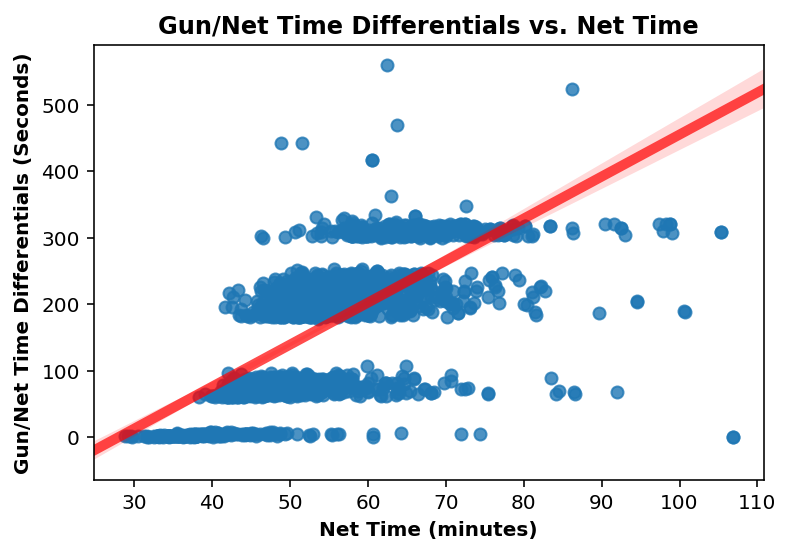

In [31]:
sns.regplot(x=full["minutes_net_tim"], y=full["gun_net_difference_seconds"], 
            line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Net Time (minutes)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Gun/Net Time Differentials (Seconds)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title('Gun/Net Time Differentials vs. Net Time',  fontweight='bold', fontsize='12', horizontalalignment='center')



Text(0.5,1,'Gun/Net Time Differentials vs. Place')

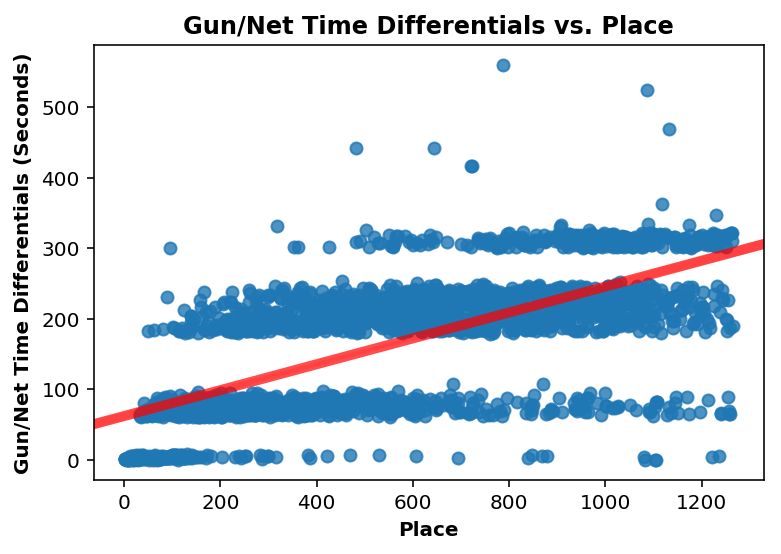

In [32]:
sns.regplot(x=full["Place"], y=full["gun_net_difference_seconds"], 
            line_kws={"color":"r","alpha":0.7,"lw":5})
plt.xlabel('Place', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Gun/Net Time Differentials (Seconds)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title('Gun/Net Time Differentials vs. Place',  fontweight='bold', fontsize='12', horizontalalignment='center')



### Question 3

In [33]:
mforty = men[men['Div_revised'] == '40-49']

In [34]:
mforty.minutes_net_tim.min()

33.1

In [35]:
mforty.minutes_net_tim.max()

98.76666666666667

In [36]:
mforty.Place.nunique()

415

In [37]:
# creating a column containing the percentiles

pindex = list(range(1,416))
pindex.reverse()
len(pindex)
mforty['percentile'] = [((i * 100)/415) for i in pindex ]

/Users/christophermarker/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [38]:
# creating a dataframe only containing Chris Doe's division

mforty['color'] = 'blue'
mforty.loc[(mforty['Name'] == 'Chris Doe'), 'color'] = 'red'
mforty.loc[(mforty['Name'] == 'Stephan Dobson'), 'color'] = 'red'

/Users/christophermarker/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/christophermarker/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [39]:
mforty[mforty['Name'] == 'Chris Doe']

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Sex,Div_revised,minutes_gun_tim,minutes_net_tim,minutes_Pace,gun_net_difference_seconds,percentile,color
1639,535.0,108/214,2869.0,Chris Doe,44.0,Reson VA,53:07,49:43,8:00,m,40-49,53.116667,49.716667,8.0,204.0,54.698795,red


In [40]:
mforty[mforty['Name'] == 'Stephan Dobson']

,Place,Div/Tot,Num,Name,Ag,Hometown,Gun Tim,Net Tim,Pace,Sex,Div_revised,minutes_gun_tim,minutes_net_tim,minutes_Pace,gun_net_difference_seconds,percentile,color
1242,138.0,21/201,977.0,Stephan Dobson,45.0,Thurmont MD,42:48,41:39,6:43,m,40-49,42.8,41.65,6.716667,69.0,90.120482,red


Text(0.5,1,"Chris Doe in the Men's 40-49 Division")

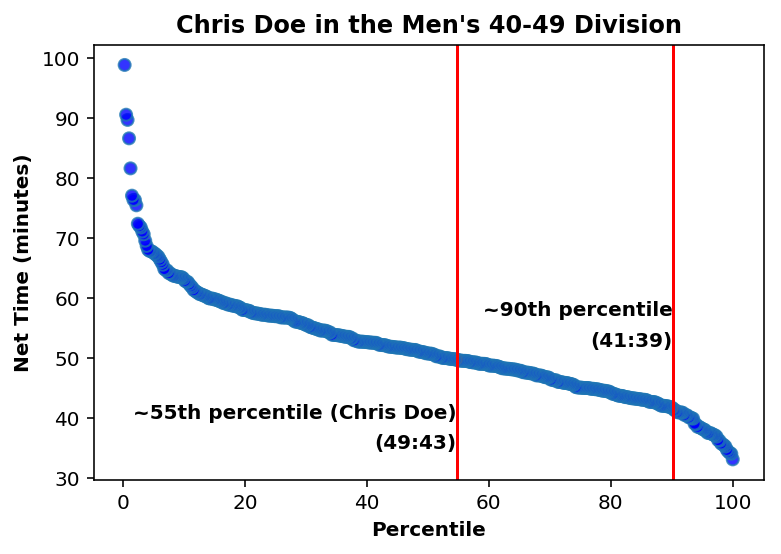

In [41]:
p40 = sns.regplot(x=mforty["percentile"], y=mforty["minutes_net_tim"], fit_reg=False, scatter_kws={'facecolors':mforty['color']})

p40.text(54.698795, 40, "~55th percentile (Chris Doe)", horizontalalignment='right', size='medium', color='black', weight='semibold')
p40.text(54.698795, 35, "(49:43)", horizontalalignment='right', size='medium', color='black', weight='semibold')

p40.text(90.120482, 57, "~90th percentile", horizontalalignment='right', size='medium', color='black', weight='semibold')
p40.text(90.120482, 52, "(41:39)", horizontalalignment='right', size='medium', color='black', weight='semibold')

plt.axvline(x=54.698795, color='red')
plt.axvline(x=90.120482, color='red')

plt.xlabel('Percentile', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Net Time (minutes)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title("Chris Doe in the Men's 40-49 Division", fontweight='bold', fontsize='12', horizontalalignment='center')

In [42]:
print('Chris Doe is separated from the top 10th percentile by', 
      list(mforty[mforty['Name'] == 'Chris Doe'].minutes_net_tim.values - mforty[mforty['Name'] == 'Stephan Dobson'].minutes_net_tim.values), 
      'minutes (8:04).')

Chris Doe is separated from the top 10th percentile by [8.06666666666667] minutes (8:04).


### Question 4

Text(0.5,1,"Men's Mean Net Times by Division")

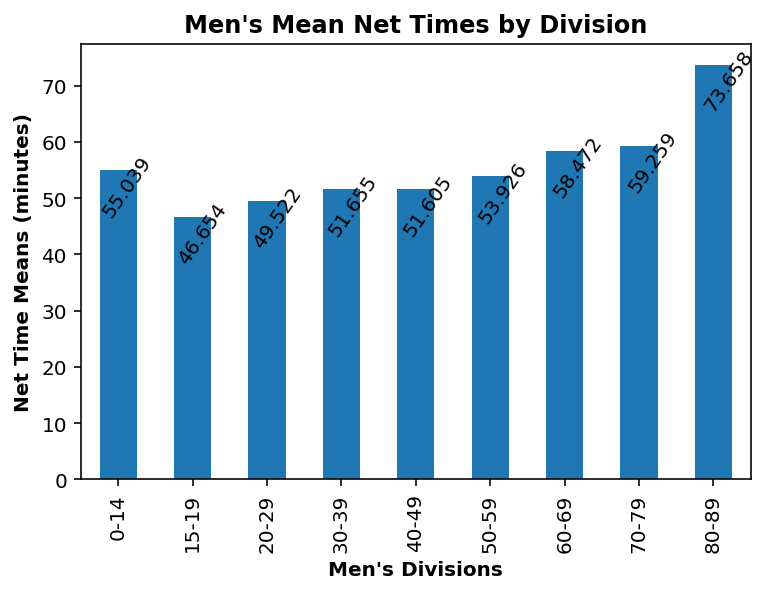

In [43]:
mmean = men.groupby('Div_revised').mean().round(3).drop(['Place', 'Num', 'Ag', 'minutes_gun_tim', 'minutes_Pace', 'gun_net_difference_seconds'], 
                                       axis=1).plot(kind='bar')


for p in mmean.patches:
    mmean.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.010), rotation='55')

mmean.legend_.remove()

plt.xlabel("Men's Divisions", fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Net Time Means (minutes)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title("Men's Mean Net Times by Division", fontweight='bold', fontsize='12', horizontalalignment='center')

Text(0.5,1,"Men's Median Net Times by Division")

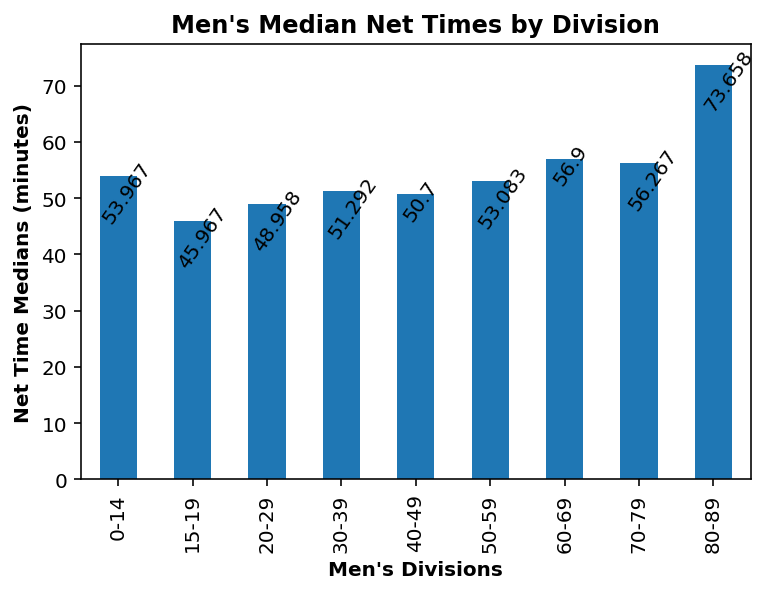

In [44]:
mmedian = men.groupby('Div_revised').median().round(3).drop(['Place', 'Num', 'Ag', 'minutes_gun_tim', 'minutes_Pace', 'gun_net_difference_seconds'], 
                                       axis=1).plot(kind='bar')


for p in mmedian.patches:
    mmedian.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.010), rotation='55')

mmedian.legend_.remove()

plt.xlabel("Men's Divisions", fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Net Time Medians (minutes)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title("Men's Median Net Times by Division", fontweight='bold', fontsize='12', horizontalalignment='center')

Text(0.5,1,"Women's Mean Net Times by Division")

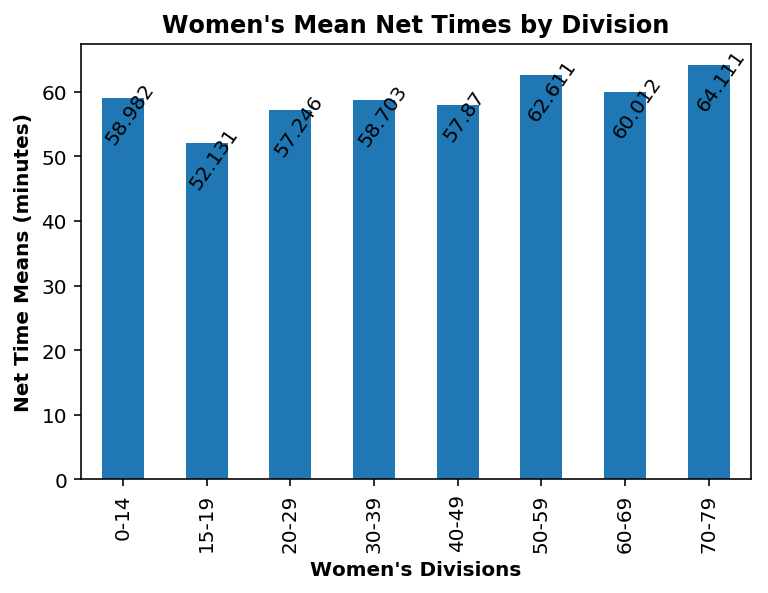

In [45]:
wmean = women.groupby('Div_revised').mean().round(3).drop(['Place', 'Num', 'Ag', 'minutes_gun_tim', 'minutes_Pace', 'gun_net_difference_seconds'], 
                                       axis=1).plot(kind='bar')


for p in wmean.patches:
    wmean.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.010), rotation='55')

wmean.legend_.remove()

plt.xlabel("Women's Divisions", fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Net Time Means (minutes)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title("Women's Mean Net Times by Division", fontweight='bold', fontsize='12', horizontalalignment='center')

Text(0.5,1,"Women's Median Net Times by Division")

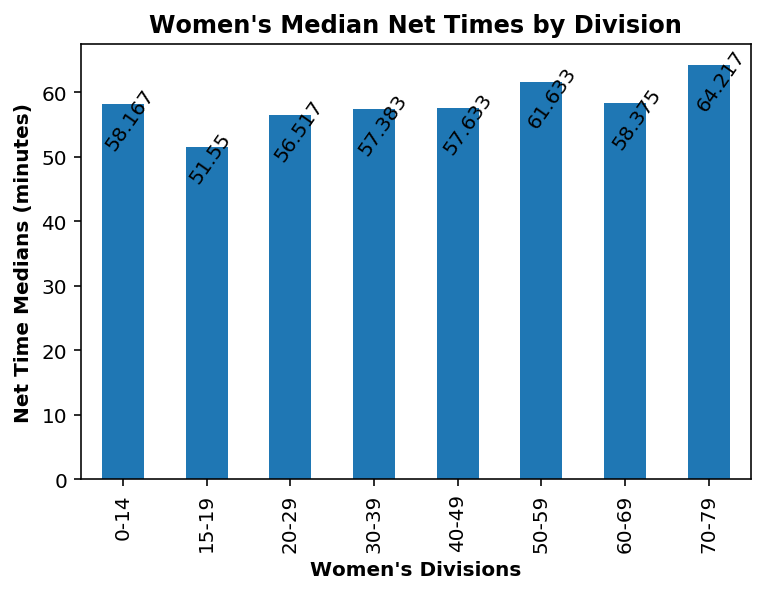

In [46]:
wmedian = women.groupby('Div_revised').median().round(3).drop(['Place', 'Num', 'Ag', 'minutes_gun_tim', 'minutes_Pace', 'gun_net_difference_seconds'], 
                                       axis=1).plot(kind='bar')


for p in wmedian.patches:
    wmedian.annotate(str(p.get_height()), (p.get_x() * 1.010, p.get_height() * 1.010), rotation='55')

wmedian.legend_.remove()

plt.xlabel("Women's Divisions", fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('Net Time Medians (minutes)', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title("Women's Median Net Times by Division", fontweight='bold', fontsize='12', horizontalalignment='center')

Text(0.5,1,"Women's Division Count")

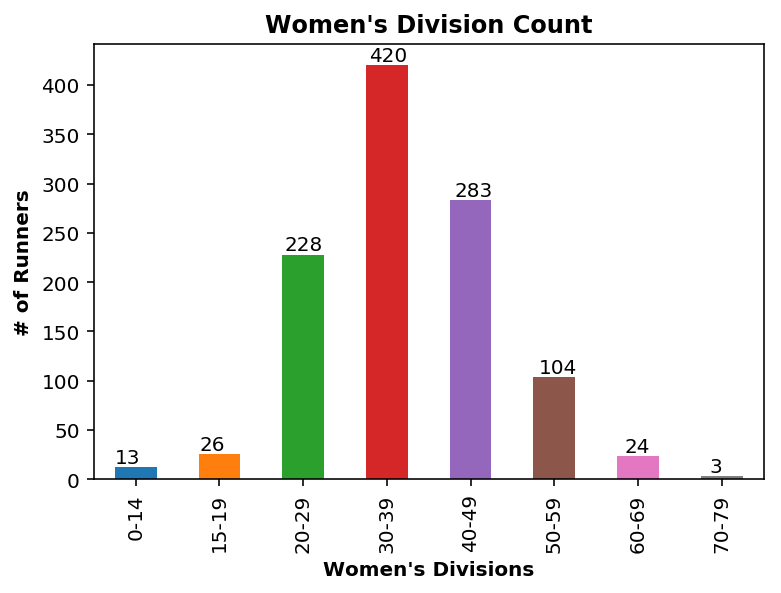

In [47]:
wcounts = women['Div_revised'].value_counts().sort_index().plot(kind='bar')

for p in wcounts.patches:
    wcounts.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() + 4))
    
plt.xlabel("Women's Divisions", fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('# of Runners', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title("Women's Division Count", fontweight='bold', fontsize='12', horizontalalignment='center')


Text(0.5,1,"Men's Division Count")

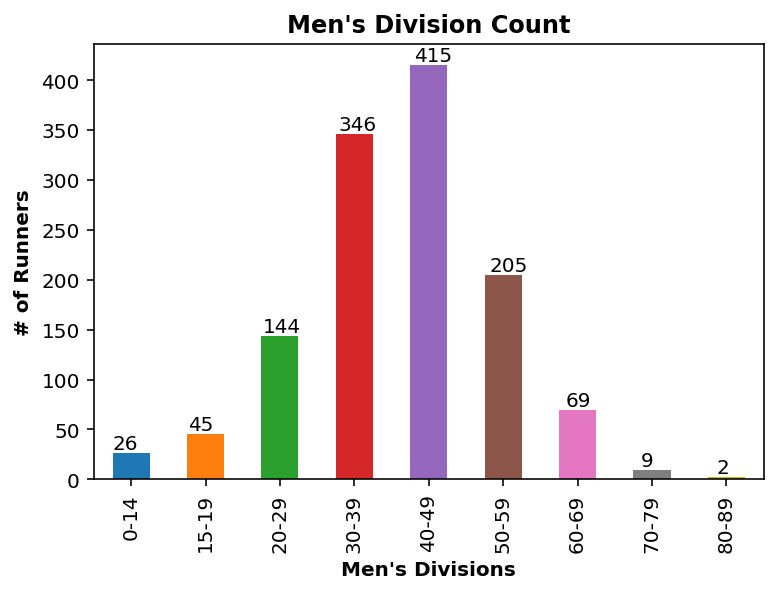

In [48]:
mcounts = men['Div_revised'].value_counts().sort_index().plot(kind='bar')

for p in mcounts.patches:
    mcounts.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() + 4))
    
plt.xlabel("Men's Divisions", fontweight='bold', fontsize='10', horizontalalignment='center')
plt.ylabel('# of Runners', fontweight='bold', fontsize='10', horizontalalignment='center')
plt.title("Men's Division Count", fontweight='bold', fontsize='12', horizontalalignment='center')